In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

In [ ]:
from typing import List, Optional
from qiskit import transpile, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
import warnings
warnings.filterwarnings("ignore")
import math
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


from qiskit_aer import AerSimulator
backend =  AerSimulator(method='statevector')

#El protocolo BB84

El protocolo BB84, desarrollado por Charles Bennett y Gilles Brassard en 1984, es el primer esquema de distribución de llaves cuánticas (QKD). Es un protocolo demostrablemente seguro, asumiendo una implementación perfecta, que depende de dos condiciones:

- **Propiedad cuántica:** la ganancia de información está limitada por el principio de incertidumbre de Heisenberg, lo que hace imposible que un espía (Eve) mida el estado cuántico sin introducir errores.

- **Posprocesamiento clásico:** Alice y Bob comparan públicamente sus bases de medición y descartan cualquier bit en el que sus bases difieran, lo que garantiza que cualquier error detectado se deba a la presencia de Eve.

## El principio de incertidumbre de Heisenberg

El principio de incertidumbre de Heisenberg, formulado por Werner Heisenberg en 1927, afirma que existe un límite a la precisión con la que se pueden expresar ciertos pares de propiedades físicas, tales como

- Posición ($x$) y momento ($p$)
- Energía ($E$) y tiempo ($t$)

## Distribución de llave

Imaginemos a dos personas: Alice quiere comunicarle un mensaje secreto a Bob a través de un medio inseguro, como la internet. Como la internet está disponible públicamente y cualquiera puede interceptarla, se debe desarrollar un esquema de cifrado especial para que Bob solo pueda acceder al mensaje de Alice con una llave especial. BB84 es un algoritmo de distribución de llaves simétricas que permite a Alice comunicarle su mensaje a Bob de forma segura.

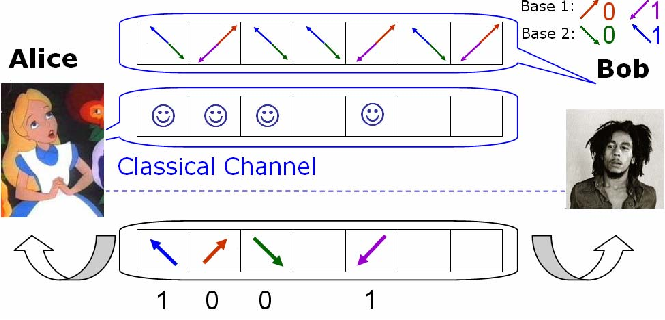

De: https://www.researchgate.net/figure/BB84-Protocol-classic-channel_fig2_4251796

Un canal clásico podría ser un cable de comunicación como una línea telefónica donde las señales eléctricas representan bits o información codificada que enviamos. Un canal de comunicación cuántica puede ser un cable de fibra óptica (ya que la criptografía cuántica se implementa mediante codificación por polarización) a través del cual podemos enviar fotones individuales (partículas de luz). Los estados de polarización se utilizan para representar qubits.

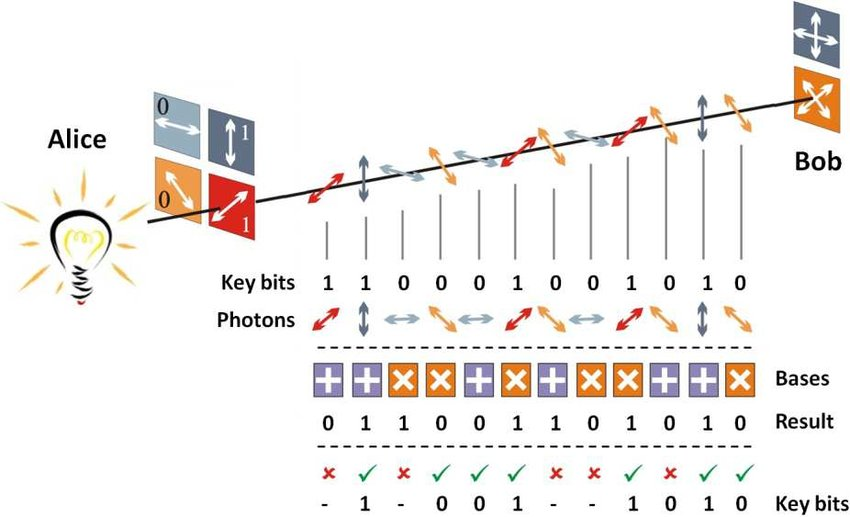

Figura de: https://peerdh.com/blogs/programming-insights/build-a-simple-quantum-key-distribution-system-using-bb84-protocol

##Paso 1: generar las secuencias de bits

Alice generará dos secuencias de 0s y 1s. Una secuencia codificará la base de cada qubit y la otra codificará su estado.

- El 0 en la base de Hadamard se representará como el estado $|+\rangle$

- El 1 en la base de Hadamard se representa como el estado $|-\rangle$.

- La base computacional se representará con 0

- La base de Hadamard se representará con 1.

Supongamos que Alice quiere generar una cadena de 16 bits. La cantidad de qubits necesarios es 16. Generaremos dos secuencias aleatorias: una representa el estado de Alice y, la otra, la base que Alice usa para codificar el estado (la información sobre qué base usa Alice para codificar el estado es muy importante para que Bob descifre el mensaje usando la clave).

- Cuando el estado de Alice es 1 y su base es 0, está usando la base computacional para codificar el estado 1.

- Si el estado de Alice es 1 y su base es 1, eso significa que está usando la puerta Hadamard para codificar el estado 1, lo que dará como resultado $|-\rangle$.

In [ ]:
# Alice genera dos conjuntos de bits aleatorios, 16 para determinar la base y 16 para transmitir, via qubits, a Bob y generar la llave

num_qubits = 16

alice_base = np.random.randint(2, size=num_qubits)
alice_estado = np.random.randint(2, size=num_qubits)
bob_base = np.random.randint(2, size=num_qubits)


print(f"Estado de Alice:\t {np.array2string(alice_estado)}")
print(f"Base de Alice:\t {np.array2string(alice_base)}")
print(f"Base de Bob:\t {np.array2string(bob_base)}")

### Ejercicio 1: explique el significado de los primeros bits de Alice, en 'alice_estado' y en 'alice_base'.

## Paso 2: circuito del protocolo BB84

1. Siempre que Alice quiere codificar 1 en un qubit, aplica una compuerta $\hat X$ al qubit. Para codificar 0, no se necesita ninguna acción ya que los qubits en qiskit se inicializan por defecto en el estado 0 y aplicar una compuerta $\hat X$ es el equivalente a aplicar NOT.

2. Siempre que quiera codificarlo en la base de Hadamard, aplica una compuerta Hadamard. No es necesaria ninguna acción para codificar un qubit en la base computacional ya que la base predeterminada en qiskit es la base computacional.

3. Luego envía los qubits a Bob.

4. Bob mide los qubits de acuerdo con su cadena binaria. Para medir un qubit en la base de Hadamard, aplica una compuerta Hadamard al qubit correspondiente y luego realiza una medición en la base computacional.

In [ ]:
def bb84_circuit(estado, base, base_medicion):

    #estado: arreglo de 0s y 1s que denota los estados a ser codificados
    #base:   arreglo de 0s and 1s que denota la base a usar para codificar
                #0 -> base computacional
                #1 -> base diagonal
    #base_medicion: arreglo de 0s and 1s que denota la base a usar para medir
                #0 -> base computacional
                #1 -> base diagonal

    num_qubits = len(estado)

    qc = QuantumCircuit(num_qubits)

    # Alice prepara los qubits
    for i in range(len(base)):
        #Alice elige el estado
        # Complete el código

        #####################

        #Alice elige la base
        # Complete el código

        ####################


    # Medición de Bob
    for i in range(len(base_medicion)):
        # Complete el código

        ####################


    qc.measure_all()

    return qc

## Paso 3: crear la llave

Alice y Bob solo conservan los bits de las cadenas en las que las bases coinciden. Por ejemplo, en el ejemplo anterior, solo si la base de codificación de Alice es 0 y la base de medición de Bob es 0 (o 1 y 1), los bits se conservan.

La probabilidad de que sus bases coincidan es $\tfrac{1}{2}$ como la probabilidad de que Alice elija la base computacional es $\tfrac{1}{2}$
y la probabilidad de que Bob elija la base computacional es $\tfrac{1}{2}$
por lo que la probabilidad de que ambos elijan la base computacional es $\tfrac{1}{4}$ o la probabilidad de que ambos elijan la base Hadamard es ($\tfrac{1}{2}\cdot\tfrac{1}{2}$) por lo que en total la probabilidad de que sus bases coincidan es $\tfrac{1}{2}$.

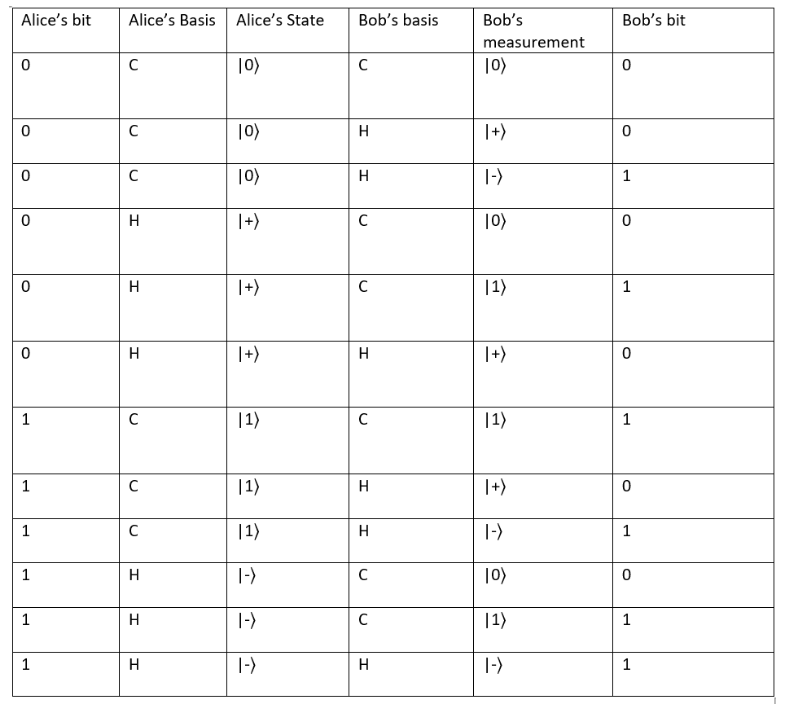

## Paso 4: ejecutar el circuito

Sólo mantenemos los bits relevantes.

In [ ]:
circuit = bb84_circuit(alice_estado, alice_base, bob_base)
counts = backend.run(circuit.reverse_bits(), shots=1).result().get_counts().most_frequent()
llave = ''
for i in range(num_qubits):
    if # Complete le condición para descrtar bits:
         llave += str(counts[i])
print(f"La llave es: {llave}")